<a href="https://colab.research.google.com/github/shakil1819/CSE442-Machine-Learning-Sessional/blob/main/Week%208%20-%20CNN%20ANN/Car_Purchase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#Dataset : https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Week%208%20-%20CNN%20ANN/car_purchasing.csv

# Notes
- AI is the simulation of human intelligence processes by reaction,expecially computer systems
- ML is the study that uses statistical methods to enable machines to improve with experience
- DL is a subset of ML, which is a subset of AI DL uses Neural Networks(Similar to neurons of brain) to imitate functionalities just like a human brain
- DL+Linguistics+NLP+CS = ChatGPT
- ![0](https://drive.google.com/uc?id=1-90IdtkzRla8CcLMQqvMTtjws5xv6xsv)

# Neuron Comparison
- Dendrite =Input
- Soma = cell body (Calculation)
- Axon = Receives  Results
- Axon Terminals = Info will be received by another neuron .For the 1st neuron It will be Output but for 2nd one it will be input. Like this way a network is  created from lots of neuron.


# ANN (Artificial neural Network)
![1](https://drive.google.com/uc?id=1H2gCyt0TE4FowlC31qzfdT_10E6w2CG4)
![2](https://drive.google.com/uc?id=1HEVLlaYvkhVCsamZoyw1xChi7S6c0cgv)
![3](https://drive.google.com/uc?id=1HWzQdPOBqWwyzzIlK83X8g0n7iaYph7D)
![4](https://drive.google.com/uc?id=1HuDJyPQeSVGUXhGdsRiHdZPWFMhV_I3E)


**Library**

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
from warnings import filterwarnings

**Read data**

In [ ]:
path = "https://raw.githubusercontent.com/shakil1819/CSE442-Machine-Learning-Sessional/main/Week%208%20-%20CNN%20ANN/car_purchasing.csv"
df = pd.read_csv(path,encoding='ISO-8859-1')
df.head()

,customer name,customer e-mail,country,gender,age,annual Salary,credit card debt,net worth,car purchase amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,Bulgaria,0,41.851720,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,Belize,0,40.870623,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,Algeria,1,43.152897,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,Cook Islands,1,58.271369,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,Brazil,1,57.313749,59729.15130,5358.712177,560304.0671,55915.46248


In [ ]:
df.describe()

,gender,age,annual Salary,credit card debt,net worth,car purchase amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.241674,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.978862,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,40.949969,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.049901,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,51.612263,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


In [ ]:
df.info()
#we can see from the output that there is no null value

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer name        500 non-null    object 
 1   customer e-mail      500 non-null    object 
 2   country              500 non-null    object 
 3   gender               500 non-null    int64  
 4   age                  500 non-null    float64
 5   annual Salary        500 non-null    float64
 6   credit card debt     500 non-null    float64
 7   net worth            500 non-null    float64
 8   car purchase amount  500 non-null    float64
dtypes: float64(5), int64(1), object(3)
memory usage: 35.3+ KB


**Test Train Split**

In [ ]:
X = df.drop(['customer name','customer e-mail','country','car purchase amount','gender'],axis=1)
y = df[['car purchase amount']]

In [ ]:
from sklearn.preprocessing import MinMaxScaler
MMS = MinMaxScaler()
X_scaled = MMS.fit_transform(X)
Y_scaled = MMS.fit_transform(y.values.reshape(-1,1))
X_scaled.shape

(500, 4)

In [ ]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_scaled,Y_scaled,test_size=0.25,random_state=101)
X_train.shape

(375, 4)

In [ ]:
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import callbacks
model = keras.Sequential([
    layers.Dense(50, activation='relu', input_shape=[4]),
    layers.Dense(25, activation='relu'),
    layers.Dropout(0.3),
    layers.Dense(1,activation='linear')
])
model.compile(
    optimizer='adam',
    loss='mean_squared_error',
)

In [ ]:
history = model.fit(X_train, y_train, batch_size=16,validation_split=0.2,epochs=50)

Epoch 1/50
19/19 [==============================] - 1s 12ms/step - loss: 0.0565 - val_loss: 0.0093
Epoch 2/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0262 - val_loss: 0.0075
Epoch 3/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0195 - val_loss: 0.0065
Epoch 4/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0163 - val_loss: 0.0060
Epoch 5/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0156 - val_loss: 0.0053
Epoch 6/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0170 - val_loss: 0.0040
Epoch 7/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0131 - val_loss: 0.0049
Epoch 8/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0128 - val_loss: 0.0033
Epoch 9/50
19/19 [==============================] - 0s 3ms/step - loss: 0.0121 - val_loss: 0.0040
Epoch 10/50
19/19 [==============================] - 0s 4ms/step - loss: 0.0111 - val_loss: 0.0025
Epoch 11/50
19/19 

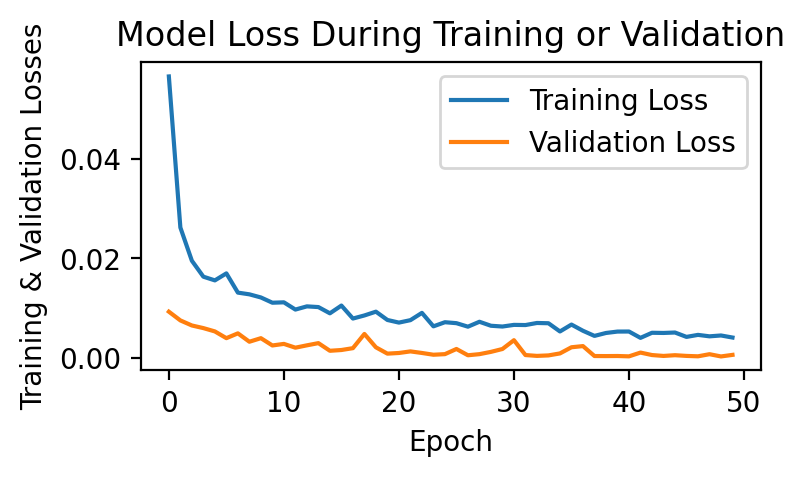

In [ ]:
plt.figure(figsize=(4,2),dpi=200)
plt.plot(history.history["loss"])
plt.plot(history.history["val_loss"])

plt.title('Model Loss During Training or Validation')
plt.ylabel('Training & Validation Losses')
plt.xlabel('Epoch')
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
loss = model.evaluate(X_test, y_test)
print(loss)

4/4 [==============================] - 0s 2ms/step - loss: 4.0405e-04
0.00040404516039416194


In [ ]:
X_random_sample = np.array([[ 55, 65000, 11600, 562341]])
y_predict = model.predict(X_random_sample)
print('Predicted Purchase Amount is =', y_predict[:,0])

1/1 [==============================] - 0s 62ms/step
Predicted Purchase Amount is = [198267.56]
